In [22]:
from custom_filters import * 
from engine.utils import get_overlap_lst, normalize_image, save_npy, load_data, get_comparison
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [23]:
# Configuration
split = 'train' # train, test
data_dir = "/data/yoojinoh/CV/data/project_data" # data root
num_images = 1 # # of images to train/test on 
save_fname = "./preds/predictions" # Path to save the prediction npy file (do not include .npy here!)

In [32]:
# Load data
# If debug set `True`, it prints out selected (images, Ground Truth boundaries) pairs
images, boundaries, selected_sample_names = load_data(data_dir, num_images, split, debug=False) 

In [25]:
def total_filter(images, b1=75, b2=200, limit=60, iter=0):
    """Our Custom Filter to Use"""    
    f1 = global_filter_1(images, iter=iter)
    f2 = global_filter_2(images)
    f3 = highlight_filter(images, b1, b2, limit)

    f1_f3_norm = get_overlap_lst(f1, f3, "add")
    
    f1f3_conventional = get_overlap_lst(f1_f3_norm, f2, "add", w1=2, w2=8)
    f1f3_conventional_norm = normalize_image(f1f3_conventional)
    
    tophat_out_norm = morph_processor(f1f3_conventional_norm)

    pred_edges = skip_connection(f1f3_conventional_norm, tophat_out_norm)
    return pred_edges 


In [33]:
annot_idx =1 # For debug (0, 1, 2 available)
gt_boundaries = [b[annot_idx] for b in boundaries] # For debug

In [34]:
# Predict Edges using our custom filter
pred_edges = total_filter(images, iter=0)

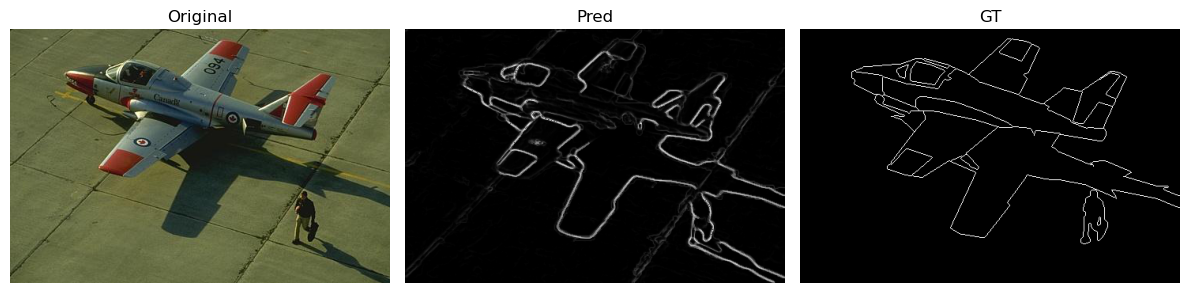

In [35]:
# For debuggings
get_comparison([images, pred_edges, gt_boundaries], ['Original', 'Pred', 'GT'])

In [ ]:
# Save predictions as npy file
save_npy(pred_edges, selected_sample_names, save_fname)